# MIDS Differential Privacy Assignment

Nitin's code

In [109]:
## This portion creates a dataset with 1200 folks without a criminal record, and 800 folks with one
import numpy as np
np.random.seed(0)

x = np.asarray([0 for x in range(1200)] + [1 for x in range(800)])
eps_list_1 = [0.010, 0.015, 0.020, 0.025, 0.030]

def laplace_counter(x,value, eps):
    return np.sum(x == value) + np.random.laplace(loc = 0, scale = 1.0/eps, size = 1)[0]

def lap_count_sim(x, value, eps_list, sim_size):
    true_count = np.sum(x == value)
    eps_repo = dict((eps, 0) for eps in eps_list)
    for eps in eps_list:
        catcher = []
        for i in range(sim_size):
            catcher.append(laplace_counter(x, value, eps))
        catcher = np.asarray(catcher)
        dev_val =  np.mean(100.0 * np.abs(true_count - catcher) / true_count)
        eps_repo[eps] = dev_val
    return eps_repo


In [115]:
laplace_counter(x, 1, .01)

730.89330000321308

We will use the above to create a quick dashboard to see the effect of changing the epsilon and the number of queries performed:

In [116]:
import matplotlib.pyplot as plt

import seaborn as sns
import ipywidgets as iw
from IPython.display import clear_output

In [ ]:
## DASHBOARD DESIGN
vspace = iw.HTML("<br>")
hspace = iw.HTML("<span style='color: white;'>-----</span>")
title_hd = iw.HTML("<h2>Differentially Private API</h2>")
eps_slider = iw.FloatSlider(
    value=.1,
    min=0.01,
    max=.5,
    step=0.01,
    description='Epsilon:',
    orientation='horizontal',
)
numqs_slider = iw.IntSlider(
    value=2,
    min=2,
    max=100,
    description='Number of Queries submitted:',
    orientation='horizontal',
)
selection = iw.HBox(children=[eps_slider, hspace, numqs_slider])
dash = iw.VBox(children=[title_hd, vspace, selection, vspace])


## EVENT HANDLING
TRUE_VALUE = np.sum(x == 1)
def plot_dash1(b):
    # only act for the value change
    if b['name'] == 'value':
        # obtain the query results
        q_res = [ laplace_counter(x, 1, eps_slider.value) for _ in range(numqs_slider.value) ]

        # clear output and plot new histogram
        clear_output()
        fig, ax = plt.subplots(1, figsize=(13,7))
        sns.distplot(pd.Series(q_res, name='DF Query Output'), rug=True, hist=False, ax=ax)
        ax.axvline(TRUE_VALUE, linewidth=3, linestyle='--', color='r')
        ax.set_xlim([700,900])
        ax.set_ylim([0,.2])

numqs_slider.observe(plot_dash1)
eps_slider.observe(plot_dash1)

In [129]:
%%javascript
$('#notebook-container').width('60%')

<IPython.core.display.Javascript object>

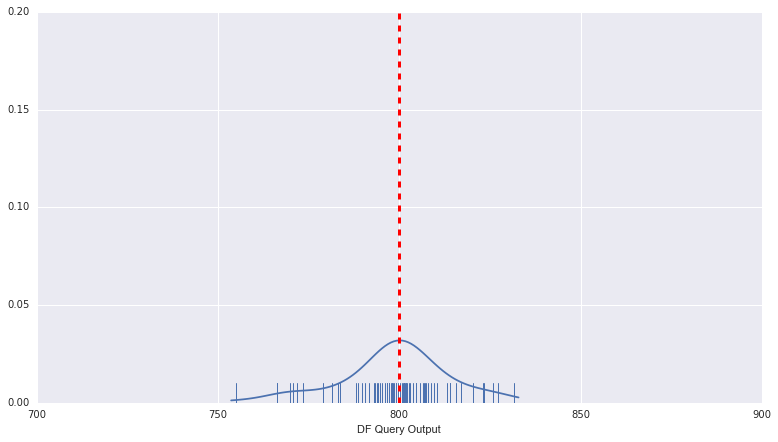

In [126]:
dash